# Price Predictor for a Real Estate Company 



In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.288208,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704890,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.888000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.211000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
# For Plotting histogram
# import matplotlib.pyplot as plt
# housing.hist(bins=50, figsize=(20,15))

## Train-Test Splitting


In [9]:
# For Learning purpose
import numpy as np 
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
# train_set, test_set = split_train_test(housing, 0.2)

In [11]:
# print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test set: 102



In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [15]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [16]:
# 95/7

In [17]:
# 376/28

In [18]:
housing = strat_train_set.copy()

## Looking for Correlations


In [19]:
corr_matrix = housing.corr()

In [20]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679946
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot: xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot: xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot: xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot: xlabel='RM', ylabel='RM'>,
        <AxesSubplot: xlabel='ZN', ylabel='RM'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot: xlabel='RM', ylabel='ZN'>,
        <AxesSubplot: xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

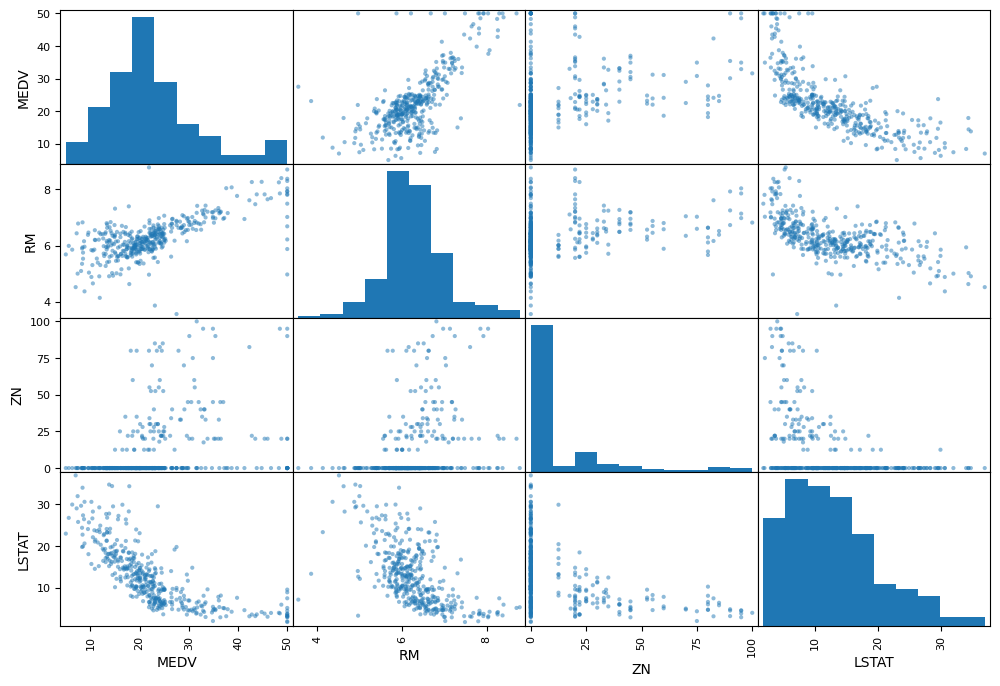

In [21]:
from pandas.plotting import scatter_matrix
attributes=["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize= (12, 8))

<AxesSubplot: xlabel='RM', ylabel='MEDV'>

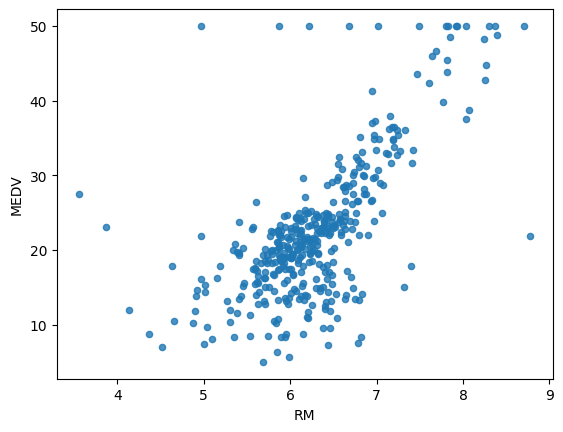

In [22]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

## Trying out Attribute combinations

In [23]:
housing["TAXRM"] = housing['TAX']/housing['RM']

In [24]:
housing.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [25]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)


MEDV       1.000000
RM         0.679946
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.526127
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot: xlabel='TAXRM', ylabel='MEDV'>

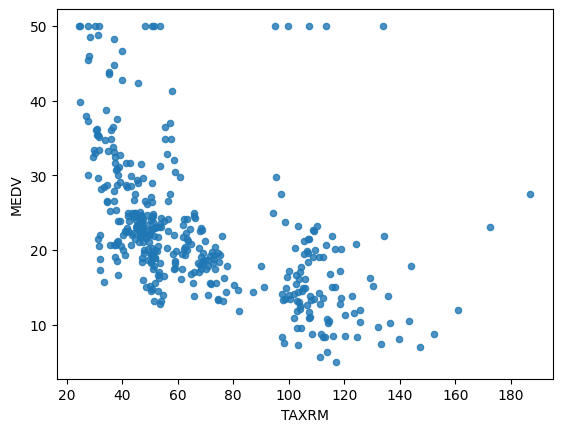

In [26]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [27]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attributes

In [28]:
# To take care of missing attributes, you have three options:
#     1. Get rid of the missing data points
#     2. Get rid of the whole attribute
#     3. Set the value to some value(0, mean or median)

In [29]:
a = housing.dropna(subset=["RM"]) #Option 1
a.shape
# Note that the original housing dataframe will remain unchanged

(401, 13)

In [30]:
housing.drop("RM", axis=1).shape # Option 2
# Note that there is no RM column and also note that the original housing dataframe will remain unchanged

(404, 12)

In [31]:
median = housing["RM"].median() # Compute median for Option 3

In [32]:
housing["RM"].fillna(median) # Option 3
# Note that the original housing dataframe will remain unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [33]:
housing.shape

(404, 13)

In [34]:
housing.describe() # before we started filling missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,401.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.282287,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.715006,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.216000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.631000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [35]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [36]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21600e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [37]:
X = imputer.transform(housing)
print(X)

[[4.81900e-02 8.00000e+01 3.64000e+00 ... 1.64000e+01 3.92890e+02
  6.57000e+00]
 [1.50100e-02 8.00000e+01 2.01000e+00 ... 1.70000e+01 3.90940e+02
  5.99000e+00]
 [4.87141e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.96210e+02
  1.86800e+01]
 ...
 [8.18700e-02 0.00000e+00 2.89000e+00 ... 1.80000e+01 3.93530e+02
  3.57000e+00]
 [4.75237e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 5.09200e+01
  1.81300e+01]
 [4.56000e-02 0.00000e+00 1.38900e+01 ... 1.64000e+01 3.92800e+02
  1.35100e+01]]


In [38]:
housing_tr = pd.DataFrame(X, columns=housing.columns)      #comverting the numpy array type x to the dataFrame

In [39]:
housing_tr.describe()


# this is the logic of StandardScaler Scaling that I have done below
# a=housing_tr['CRIM'].mean()
# b=housing_tr['CRIM'].std()
# print(a,'  ',b)

# d=housing_tr['CRIM'][1]
# print(d)
# ans=(d-a)/b
# print(ans)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281795,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712362,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.216000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

In [40]:
# Primarily, three types of objects

# 1. Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters

# 2. Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

# 3. Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

## Feature Scaling

In [41]:
# Primarily, two types of feature scaling methods:

# 1. Min-max scaling (Normalization) (value - min)/(max - min) Sklearn provides a class called MinMaxScaler for this

# 2. Standardization (value - mean)/std Sklearn provides a class called StandardScaler for this

# these are done for every columns of the dataframe or array

## Creating a Pipeline

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])

In [43]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [44]:
housing_num_tr.shape
print(housing_num_tr)

[[-0.43942006  3.12628155 -1.12165014 ... -0.97491834  0.41164221
  -0.86091034]
 [-0.44352175  3.12628155 -1.35893781 ... -0.69277865  0.39131918
  -0.94116739]
 [ 0.15682292 -0.4898311   0.98336806 ...  0.81196637  0.44624347
   0.81480158]
 ...
 [-0.43525657 -0.4898311  -1.23083158 ... -0.22254583  0.41831233
  -1.27603303]
 [ 0.14210728 -0.4898311   0.98336806 ...  0.81196637 -3.15239177
   0.73869575]
 [-0.43974024 -0.4898311   0.37049623 ... -0.97491834  0.41070422
   0.09940681]]


## Selecting a desired model for Dragon Real Estates

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)
# print(model.coef_)
# print(model.intercept_)

RandomForestRegressor()

In [46]:
some_data = housing.iloc[:5]
some_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15


In [47]:
some_labels = housing_labels.iloc[:5]
some_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

In [48]:
prepared_data = my_pipeline.transform(some_data)
prepared_data

array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
        -0.24427187, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
        -0.97491834,  0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, -0.27288841, -1.0542567 ,
         0.49643762, -1.3938808 ,  2.19312325, -0.65766683, -0.78557904,
        -0.69277865,  0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, -0.27288841,  0.47919371,
         0.28420397,  0.87020968, -0.68730678,  1.63579367,  1.50571521,
         0.81196637,  0.44624347,  0.81480158],
       [-0.42292925, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.13240772, -0.52225911,  0.37882487, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.81939807],
       [-0.40786253, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.04245438, -1.42222622,  0.79643404, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.91902752]])

In [49]:
model.predict(prepared_data)

array([22.5  , 25.139, 16.224, 23.315, 23.599])

In [50]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model 

In [51]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [52]:

rmse

1.258655814905743

## Using better evaluation technique - Cross Validation

In [53]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [54]:

rmse_scores

array([2.89428934, 2.9344269 , 4.36062875, 2.65185726, 3.36161145,
       2.56623297, 4.77254888, 3.33815858, 3.39614651, 3.2788695 ])

In [55]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [56]:
print_scores(rmse_scores)

Scores: [2.89428934 2.9344269  4.36062875 2.65185726 3.36161145 2.56623297
 4.77254888 3.33815858 3.39614651 3.2788695 ]
Mean:  3.3554770153878435
Standard deviation:  0.6733681861677973


## Saving the model


In [57]:
arg=(model,my_pipeline)
from joblib import dump, load
dump(arg, 'Dragon.joblib') 

['Dragon.joblib']

## Testing the model on test data

In [59]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[24.359 11.489 26.04  21.862 18.712 15.113 20.491 14.138 31.588 40.814
 19.672 12.036 23.443 26.137 19.728 10.918 31.306 14.097 23.517 18.111
 19.816 17.66  17.292 22.599 18.831 31.626 16.197 33.423  8.749 33.245
 24.527 21.299 22.835 11.03  21.145 10.866 42.917 24.362 23.86  42.875
 24.11  29.809 20.283 20.856 18.844 32.851 44.882 20.264 20.2   22.753
 21.178 14.674 21.281 14.504 24.914 32.518 42.465 29.242 19.796 20.76
 47.083  9.353 19.087 24.781 14.406 32.415 20.076 18.474 19.254 34.999
 25.747 22.744 21.194 22.182 34.361 13.02  16.033 20.213 20.801 21.581
 22.161 21.089 13.869 22.644 20.488 21.601 13.895 21.436 21.323 22.925
 18.276 26.89   7.162 26.51  18.873 29.119 19.717 31.063 14.692 26.853
 21.288 20.344] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1,

In [60]:
final_rmse

2.9063483911238563

In [63]:
prepared_data

array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
        -0.24427187, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
        -0.97491834,  0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, -0.27288841, -1.0542567 ,
         0.49643762, -1.3938808 ,  2.19312325, -0.65766683, -0.78557904,
        -0.69277865,  0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, -0.27288841,  0.47919371,
         0.28420397,  0.87020968, -0.68730678,  1.63579367,  1.50571521,
         0.81196637,  0.44624347,  0.81480158],
       [-0.42292925, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.13240772, -0.52225911,  0.37882487, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.81939807],
       [-0.40786253, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.04245438, -1.42222622,  0.79643404, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.91902752]])

In [64]:
from joblib import dump, load
import numpy as np
model,pipe = load('Dragon.joblib') 
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034]])
model.predict(features)

array([26.114])

In [65]:
a=np.array([[4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68]])
X_test_prepared = my_pipeline.transform(a)
print(X_test_prepared)
final_predictions = model.predict(X_test_prepared)
print(final_predictions)

[[ 0.15682292 -0.4898311   0.98336806 -0.27288841  0.47919371  0.28420397
   0.87020968 -0.68730678  1.63579367  1.50571521  0.81196637  0.44624347
   0.81480158]]
[16.224]


C:\Users\Manik Arora\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
